![alt text](https://drive.google.com/uc?export=view&id=1UXScsVx_Wni_JuDdB8LeTnM6jsPfIwkW)

Proprietary content. © Great Learning. All Rights Reserved. Unauthorized use or distribution prohibited.

# Instructions
- Some parts of the code are already done for you
- You need to execute all the cells
- You need to add the code where ever you see `"#### Add your code here ####"`
- Marks are mentioned along with the cells

# Face recognition
Task is to recognize a faces

### Dataset
**Aligned Face Dataset from Pinterest**

This dataset contains 10.770 images for 100 people. All images are taken from 'Pinterest' and      aligned using dlib library.

In [1]:
import tensorflow
tensorflow.__version__

'2.3.0'

#### Mount Google drive if you are using google colab
- We recommend using Google Colab as you can face memory issues and longer runtimes while running on local

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#### Change current working directory to project folder (2 mark)

In [3]:
import os
os.chdir('/content/drive/My Drive/Paridhi_Colab/ACV Project')

In [4]:
!ls

'Aligned Faces'   PINS				 vgg_face_weights.h5
 pins		  Questions_Notebook_ACV.ipynb


### Extract the zip file (4 marks)
- Extract Aligned Face Dataset from Pinterest.zip

In [ ]:
# Dataset - https://drive.google.com/drive/folders/1loTfVtTexigkhv58M3tGgkRTIXKxVJ4X

In [ ]:
from zipfile import ZipFile

#with ZipFile('/content/drive/My Drive/Paridhi_Colab/ACV Project/Aligned Faces/Aligned Face Dataset.zip', 'r') as z:
with ZipFile('Aligned Faces/Aligned Face Dataset.zip', 'r') as z:
  z.extractall()

In [5]:
!ls

'Aligned Faces'   PINS				 vgg_face_weights.h5
 pins		  Questions_Notebook_ACV.ipynb


### Function to load images
- Define a function to load the images from the extracted folder and map each image with person id 


In [6]:
import numpy as np
import os

class IdentityMetadata():
    def __init__(self, base, name, file):
        # print(base, name, file)
        # dataset base directory
        self.base = base
        # identity name
        self.name = name
        # image file name
        self.file = file

    def __repr__(self):
        return self.image_path()

    def image_path(self):
        return os.path.join(self.base, self.name, self.file) 
    
def load_metadata(path):
    metadata = []
    for i in os.listdir(path):
        for f in os.listdir(os.path.join(path, i)):
            # Check file extension. Allow only jpg/jpeg' files.
            ext = os.path.splitext(f)[1]
            if ext == '.jpg' or ext == '.jpeg':
                metadata.append(IdentityMetadata(path, i, f))
    return np.array(metadata)

# metadata = load_metadata('images')
metadata = load_metadata('PINS')

In [7]:
metadata[3000]

PINS/pins_Jesse Eisenberg/Jesse Eisenberg166_1392.jpg

### Define function to load image
- Define a function to load image from the metadata

In [8]:
import cv2
def load_image(path):
    img = cv2.imread(path, 1)
    # OpenCV loads images with color channels
    # in BGR order. So we need to reverse them
    return img[...,::-1]

#### Load a sample image (4 marks)
- Load one image using the function "load_image"

In [9]:
path = 'PINS/pins_Aaron Paul/Aaron Paul0_262.jpg'
load_image(path)

array([[[233, 188, 165],
        [231, 186, 163],
        [220, 178, 156],
        ...,
        [106,  63,  72],
        [106,  63,  72],
        [106,  63,  72]],

       [[232, 187, 164],
        [233, 188, 165],
        [220, 178, 156],
        ...,
        [106,  63,  72],
        [106,  63,  72],
        [106,  63,  72]],

       [[230, 186, 161],
        [228, 184, 159],
        [206, 164, 140],
        ...,
        [106,  63,  72],
        [106,  63,  72],
        [106,  63,  72]],

       ...,

       [[198, 118,  91],
        [197, 120,  94],
        [195, 119,  95],
        ...,
        [ 78,  66,  76],
        [ 78,  66,  76],
        [ 78,  66,  76]],

       [[200, 120,  93],
        [200, 120,  93],
        [198, 121,  95],
        ...,
        [ 78,  66,  76],
        [ 78,  66,  76],
        [ 78,  66,  76]],

       [[201, 121,  94],
        [201, 121,  94],
        [199, 122,  96],
        ...,
        [ 78,  66,  76],
        [ 78,  66,  76],
        [ 78,  66,  76]]

### VGG Face model
- Here we are giving you the predefined model for VGG face

In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import ZeroPadding2D, Convolution2D, MaxPooling2D, Dropout, Flatten, Activation

def vgg_face():	
    model = Sequential()
    model.add(ZeroPadding2D((1,1),input_shape=(224,224, 3)))
    model.add(Convolution2D(64, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))
    
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(128, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(128, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))
    
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(256, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(256, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(256, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))
    
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))
    
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))
    
    model.add(Convolution2D(4096, (7, 7), activation='relu'))
    model.add(Dropout(0.5))
    model.add(Convolution2D(4096, (1, 1), activation='relu'))
    model.add(Dropout(0.5))
    model.add(Convolution2D(2622, (1, 1)))
    model.add(Flatten())
    model.add(Activation('softmax'))
    return model

#### Load the model (4 marks)
- Load the model defined above
- Then load the given weight file named "vgg_face_weights.h5"

In [11]:
model = vgg_face()
model.load_weights('vgg_face_weights.h5')

### Get vgg_face_descriptor

In [12]:
from tensorflow.keras.models import Model
vgg_face_descriptor = Model(inputs=model.layers[0].input, outputs=model.layers[-2].output)

In [13]:
vgg_face_descriptor

In [14]:
metadata[100]

PINS/pins_Alvaro Morte/Alvaro Morte145_862.jpg

### Generate embeddings for each image in the dataset
- Given below is an example to load the first image in the metadata and get its embedding vector from the pre-trained model. 

In [15]:
# Get embedding vector for first image in the metadata using the pre-trained model

img_path = metadata[0].image_path()
img = load_image(img_path)

# Normalising pixel values from [0-255] to [0-1]: scale RGB values to interval [0,1]
img = (img / 255.).astype(np.float32)

img = cv2.resize(img, dsize = (224,224))
#print(img.shape)

# Obtain embedding vector for an image
# Get the embedding vector for the above image using vgg_face_descriptor model and print the shape 

embedding_vector = vgg_face_descriptor.predict(np.expand_dims(img, axis=0))[0]
#print(embedding_vector.shape)
#print(embedding_vector)
print(len(embedding_vector))

2622


In [16]:
embedding_vector

array([ 0.03170307, -0.0150513 , -0.01243402, ...,  0.00043141,
        0.00219081, -0.00908097], dtype=float32)

### Generate embeddings for all images (10 marks)
- Write code to iterate through metadata and create embeddings for each image using `vgg_face_descriptor.predict()` and store in a list with name `embeddings`

- If there is any error in reading any image in the dataset, fill the emebdding vector of that image with 2622-zeroes as the final embedding from the model is of length 2622.

In [ ]:
#embeddings = np.zeros((metadata.shape[0], 2622))

In [17]:
embeddings = []
count = 0 

for i, m in enumerate(metadata):
  print('image',i)
  img_path = metadata[i].image_path()
  #print(img_path)
  if i == 176:
    embedding_vector = np.zeros((2622))

  else:
    img = load_image(img_path)
    img = (img / 255.).astype(np.float32)
    img = cv2.resize(img, dsize = (224,224))
    embedding_vector = vgg_face_descriptor.predict(np.expand_dims(img, axis=0))[0]
  embeddings.append(embedding_vector)


Streaming output truncated to the last 5000 lines.
image 5771
image 5772
image 5773
image 5774
image 5775
image 5776
image 5777
image 5778
image 5779
image 5780
image 5781
image 5782
image 5783
image 5784
image 5785
image 5786
image 5787
image 5788
image 5789
image 5790
image 5791
image 5792
image 5793
image 5794
image 5795
image 5796
image 5797
image 5798
image 5799
image 5800
image 5801
image 5802
image 5803
image 5804
image 5805
image 5806
image 5807
image 5808
image 5809
image 5810
image 5811
image 5812
image 5813
image 5814
image 5815
image 5816
image 5817
image 5818
image 5819
image 5820
image 5821
image 5822
image 5823
image 5824
image 5825
image 5826
image 5827
image 5828
image 5829
image 5830
image 5831
image 5832
image 5833
image 5834
image 5835
image 5836
image 5837
image 5838
image 5839
image 5840
image 5841
image 5842
image 5843
image 5844
image 5845
image 5846
image 5847
image 5848
image 5849
image 5850
image 5851
image 5852
image 5853
image 5854
image 5855
image 5856
ima

In [18]:
embeddings[36].shape

(2622,)

### Function to calculate distance between given 2 pairs of images.

- Consider distance metric as "Squared L2 distance"
- Squared l2 distance between 2 points (x1, y1) and (x2, y2) = (x1-x2)^2 + (y1-y2)^2

In [19]:
def distance(emb1, emb2):
    return np.sum(np.square(emb1 - emb2))

#### Plot images and get distance between the pairs given below
- 2, 3 and 2, 180
- 30, 31 and 30, 100
- 70, 72 and 70, 115

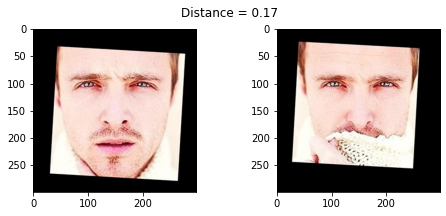

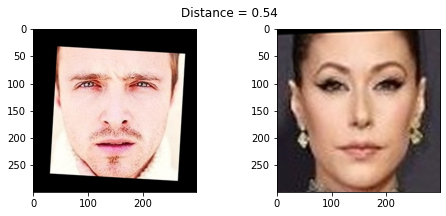

In [20]:
import matplotlib.pyplot as plt

def show_pair(idx1, idx2):
    plt.figure(figsize=(8,3))
    plt.suptitle(f'Distance = {distance(embeddings[idx1], embeddings[idx2]):.2f}')
    plt.subplot(121)
    plt.imshow(load_image(metadata[idx1].image_path()))
    plt.subplot(122)
    plt.imshow(load_image(metadata[idx2].image_path()));    

show_pair(2, 3)
show_pair(2, 180)

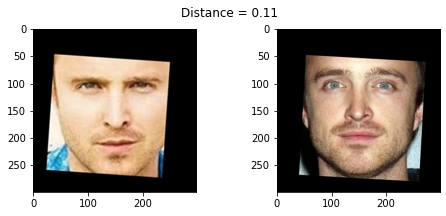

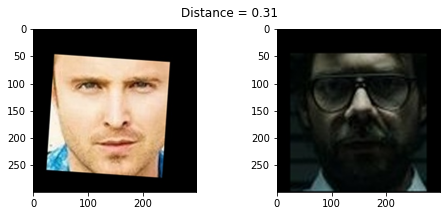

In [21]:
show_pair(30, 31)
show_pair(30, 100)

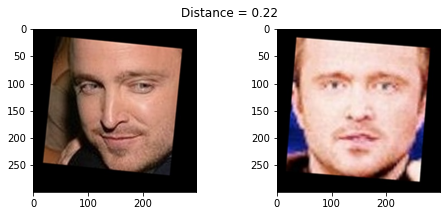

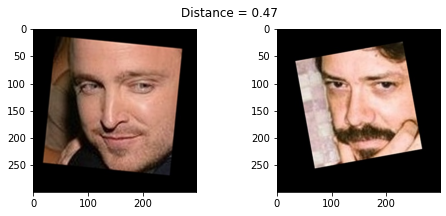

In [22]:
show_pair(70, 72)
show_pair(70, 115)

### Create train and test sets (10 marks)
- Create X_train, X_test and y_train, y_test
- Use train_idx to seperate out training features and labels
- Use test_idx to seperate out testing features and labels

In [23]:
# Preparing X_train
  
train_idx = np.arange(metadata.shape[0]) % 9 != 0 
X_train = []
check  = 0

for count in range(len(embeddings)):  
  if train_idx[count] == True:
    check = check + 1
    #print(embeddings[count])
    a = embeddings[count]
    X_train.append(a)
#print('******check',check)
#print('*************') 


In [24]:
X_train = np.array(X_train)
print(X_train.shape)

(9573, 2622)


In [25]:
#Preparing  X_test

test_idx = np.arange(metadata.shape[0]) % 9 == 0 
X_test = []

for count1 in range(len(embeddings)):  
  if test_idx[count1] == True:
    #print(test_idx[count1],count1)
    #print(embeddings[count1])
    a = embeddings[count1]
    X_test.append(a)
#print('count1',count1)
#print('*************')

In [26]:
X_test = np.array(X_test)
print(X_test.shape)

(1197, 2622)


Target

In [27]:
#target
targets = np.array([m.name for m in metadata])
targets

array(['pins_Aaron Paul', 'pins_Aaron Paul', 'pins_Aaron Paul', ...,
       'pins_zendaya', 'pins_zendaya', 'pins_zendaya'], dtype='<U29')

In [28]:
#train labels
count = 0 
y_train = []
for i in train_idx:
  if i == True:
    y_train.append(targets[count])
  count = count + 1
#print('y_train = 'y_train[10])
print(len(y_train))

y_train = np.array(y_train)

9573


In [29]:
#test labels
count = 0 
y_test = []
for i in test_idx:
  if i == True:
    y_test.append(targets[count])
  count = count + 1
#print(y_test[10])
print(len(y_test))

y_test = np.array(y_test)

1197


In [30]:
X_train.shape

(9573, 2622)

In [31]:
X_test.shape

(1197, 2622)

In [32]:
y_train.shape

(9573,)

In [33]:
y_test.shape 

(1197,)

### Encode the Labels (6 marks)
- Encode the targets
- Use LabelEncoder

In [35]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)
#le.classes_
print(len(y_train_encoded))
print(y_train_encoded[0:100])

9573
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [36]:
y_test_encoded = le.transform(y_test)
print(y_test_encoded)

[ 0  0  0 ... 99 99 99]


### Standardize the feature values (6 marks)
- Scale the features using StandardScaler

In [37]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [38]:
X_train.shape

(9573, 2622)

In [39]:
X_test.shape

(1197, 2622)

### Reduce dimensions using PCA (6 marks)
- Reduce feature dimensions using Principal Component Analysis
- Set the parameter n_components=128

In [40]:
from sklearn.decomposition import PCA
pca = PCA(n_components=128)
X_train = pca.fit_transform(X_train)

In [41]:
X_train.shape

(9573, 128)

In [42]:
X_test = pca.transform(X_test)
X_test.shape

(1197, 128)

### Build a Classifier (6 marks)
- Use SVM Classifier to predict the person in the given image
- Fit the classifier and print the score

In [43]:
from sklearn.svm import SVC

clf = SVC()
clf.fit(X_train, y_train_encoded)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [44]:
y_pred = clf.predict(X_test)

In [45]:
y_pred

array([ 0,  0,  0, ..., 99, 99, 99])

In [46]:
y_test_encoded

array([ 0,  0,  0, ..., 99, 99, 99])

In [47]:
from sklearn.metrics import accuracy_score
print('Score:',accuracy_score(y_test_encoded,y_pred)*100)

Score: 95.90643274853801


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test_encoded, y_pred))

### Test results (2 mark)
- Take 10th image from test set and plot the image
- Report to which person(folder name in dataset) the image belongs to

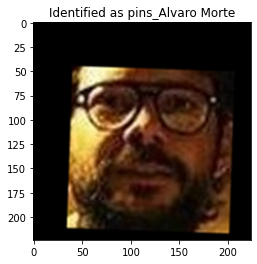

In [49]:
import warnings
# Suppress LabelEncoder warning
warnings.filterwarnings('ignore')

example_idx = 10
example_image = load_image(metadata[test_idx][example_idx].image_path())
example_image
example_image = (example_image / 255.).astype(np.float32)
example_image = cv2.resize(example_image, dsize = (224,224))
embedding_vector = vgg_face_descriptor.predict(np.expand_dims(example_image, axis=0))
v = scaler.transform(embedding_vector)
v = pca.transform(v)

example_prediction = clf.predict(v)
example_identity = le.inverse_transform(example_prediction)[0]


plt.imshow(example_image)
plt.title(f'Identified as {example_identity}');